In [1]:
import platform
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err, get_rays_in_sub_det_vectorized, get_rays_in_sub_det, get_raw_residuals, get_circle_scan, plot_2D_circle_scan

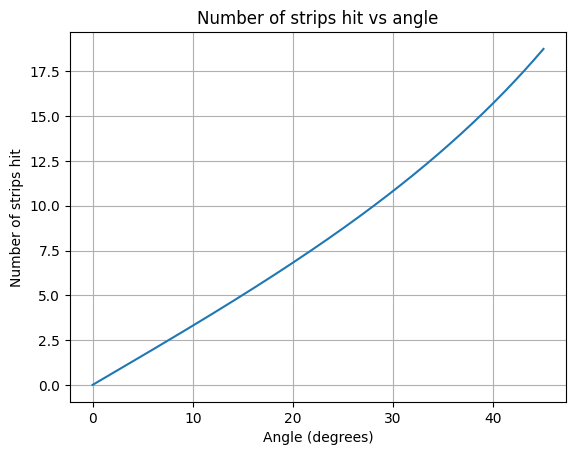

In [2]:
drift_gap = 30  # mm
strip_pitch = 0.8 * 2  # mm
angles = np.linspace(0, np.pi / 4, 1000)

strips_hit = drift_gap * np.tan(angles) / strip_pitch

fig, ax = plt.subplots()
ax.plot(np.rad2deg(angles), strips_hit, linestyle='-')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Number of strips hit')
ax.set_title('Number of strips hit vs angle')
ax.grid()

In [3]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dphnpct50.extra.cea.fr':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 5  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_strip'

file_nums = list(range(0, 45))
# file_nums = list(range(0, 109))
# file_nums = 'all'

noise_sigma = 8

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 237/237 [00:01<00:00, 144.67it/s]


In [5]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [6]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, noise_sigma, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [5, 6, 7, 8]
HV: {'drift': 600, 'resist_1': 410}
Reading in data...


100%|██████████| 45/45 [00:10<00:00,  4.41it/s]


Read in data shape: (96834, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  8.31it/s]


Fitting time: 2.1092448234558105 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
Hits shape: (96834, 256)


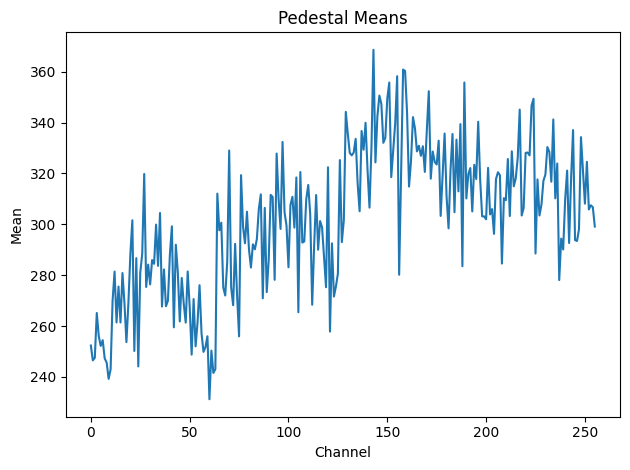

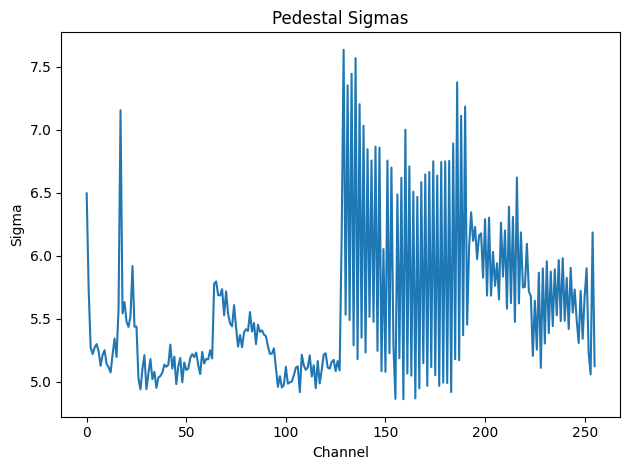

In [7]:
det.dream_data.plot_pedestals()

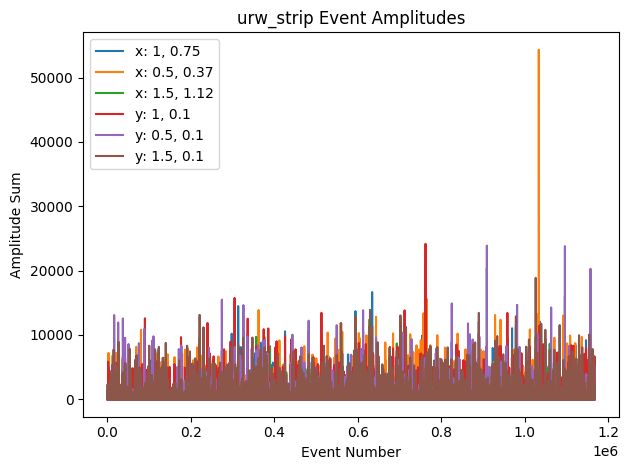

In [8]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

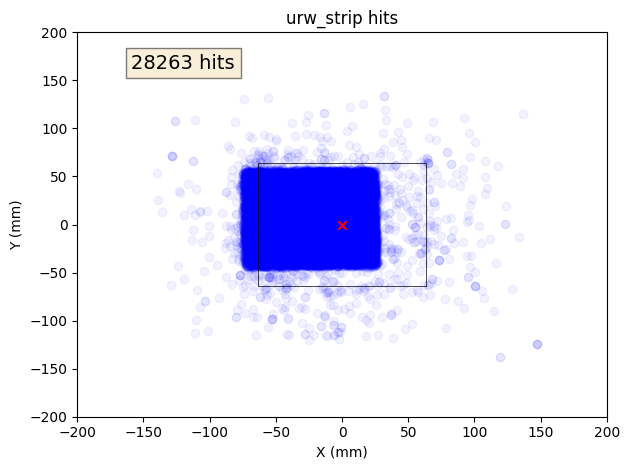

In [9]:
plot_ray_hits_2d(det, ray_data)

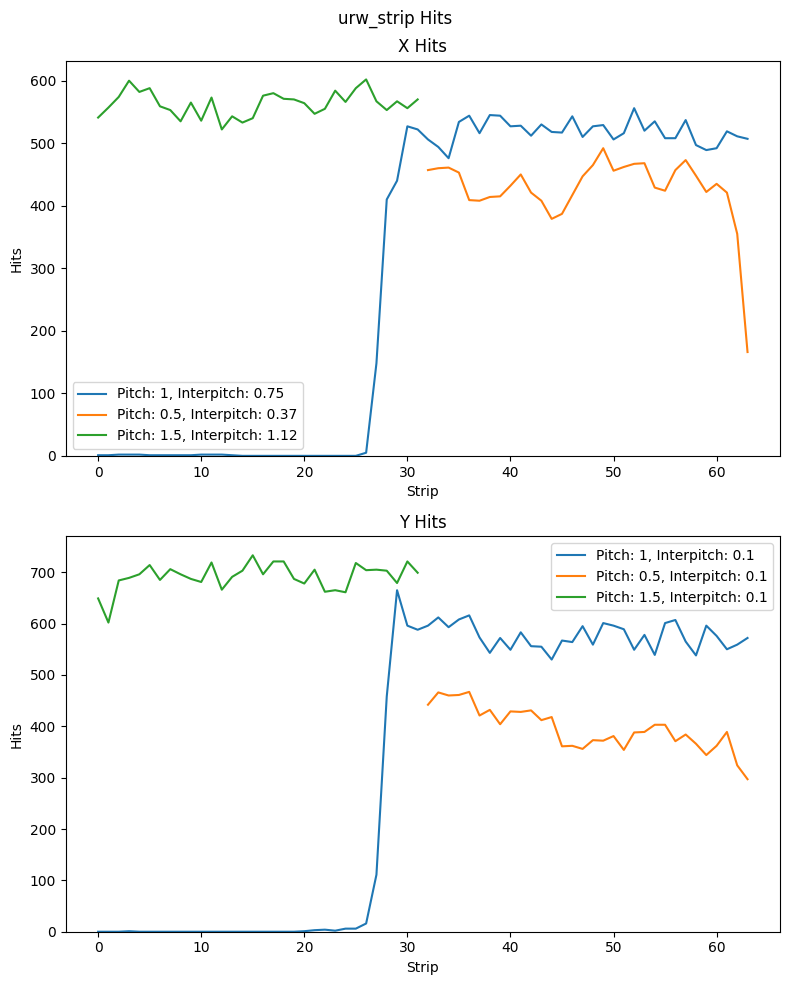

In [10]:
det.plot_hits_1d()

In [11]:
print(len(det.dream_data.hits))

96834


z: 794.0
z: 794.3448275862069
z: 794.6896551724138
z: 795.0344827586207
z: 795.3793103448276
z: 795.7241379310345
z: 796.0689655172414
z: 796.4137931034483
z: 796.7586206896551
z: 797.1034482758621
z: 797.448275862069
z: 797.7931034482758
z: 798.1379310344828
z: 798.4827586206897
z: 798.8275862068965
z: 799.1724137931035
z: 799.5172413793103
z: 799.8620689655172
z: 800.2068965517242
z: 800.551724137931
z: 800.8965517241379
z: 801.2413793103449
z: 801.5862068965517
z: 801.9310344827586
z: 802.2758620689655
z: 802.6206896551724
z: 802.9655172413793
z: 803.3103448275862
z: 803.6551724137931
z: 804.0
z_rot: -1.0
z_rot: -0.9310344827586207
z_rot: -0.8620689655172413
z_rot: -0.7931034482758621
z_rot: -0.7241379310344828
z_rot: -0.6551724137931034
z_rot: -0.5862068965517242
z_rot: -0.5172413793103449
z_rot: -0.4482758620689655
z_rot: -0.3793103448275862
z_rot: -0.31034482758620685
z_rot: -0.24137931034482762
z_rot: -0.1724137931034483
z_rot: -0.10344827586206895
z_rot: -0.034482758620689724
z

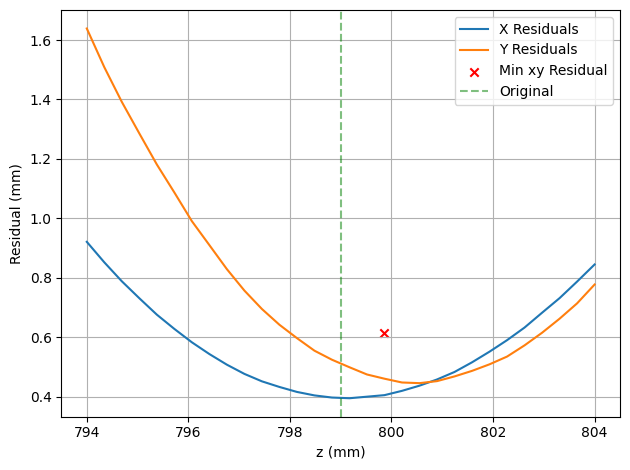

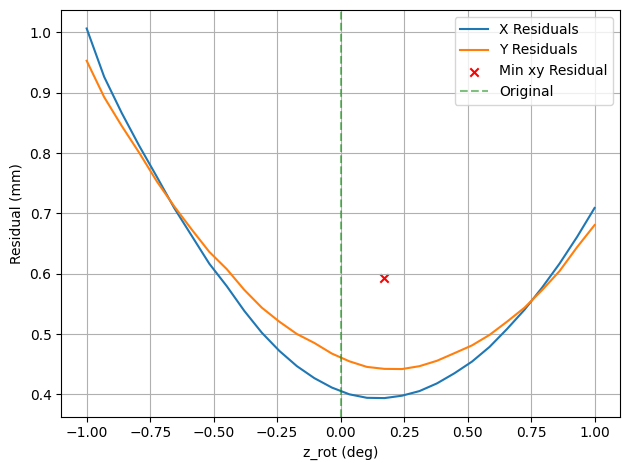

In [13]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

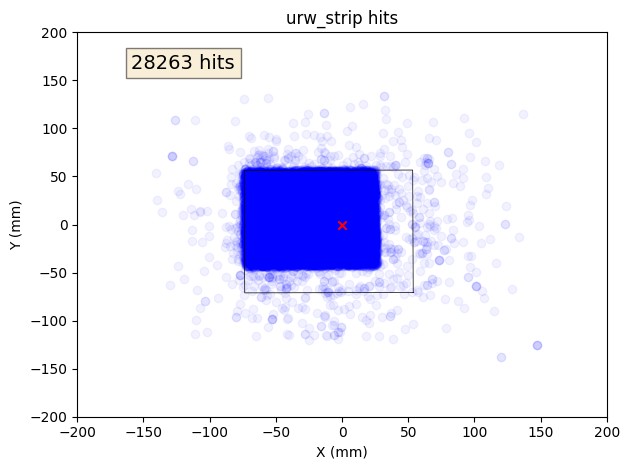

In [14]:
plot_ray_hits_2d(det, ray_data)

Text(0.5, 0, 'Ray Y Angles')

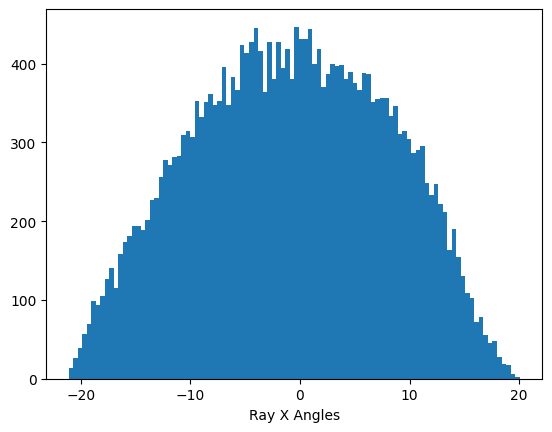

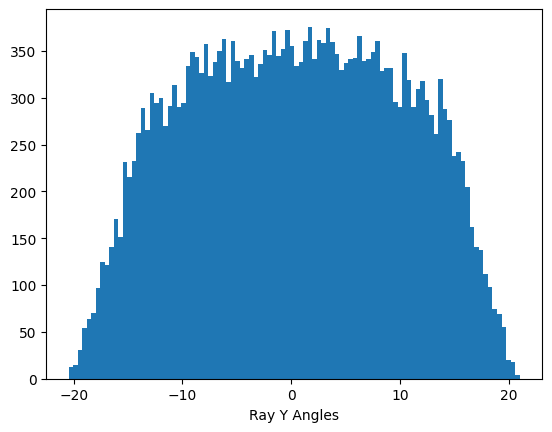

In [47]:
all_x_rays, all_y_rays, all_ray_x_angles, all_ray_y_angles, all_ray_event_nums = [], [], [], [], []

for sub_det in det.sub_detectors:
    event_nums_i, centroids_i = sub_det.get_event_centroids()
    event_nums_i = list(event_nums_i)
    x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2], event_nums_i)
    x_ray_angles, y_ray_angles, event_num_rays = ray_data.get_xy_angles(event_nums_i)
    all_x_rays.extend(list(x_rays))
    all_y_rays.extend(list(y_rays))
    all_ray_x_angles.extend(list(x_ray_angles))
    all_ray_y_angles.extend(list(y_ray_angles))
    all_ray_event_nums.extend(list(event_num_rays))

df = pd.DataFrame({
    "event_num": all_ray_event_nums,
    "x": all_x_rays,
    "y": all_y_rays,
    "x_angle": all_ray_x_angles,
    "y_angle": all_ray_y_angles,
})

df = df.drop_duplicates(subset="event_num")

# Get back lists
all_ray_event_nums = df["event_num"].tolist()
all_x_rays = df["x"].tolist()
all_y_rays = df["y"].tolist()
all_ray_x_angles = df["x_angle"].tolist()
all_ray_y_angles = df["y_angle"].tolist()

fig_x_angles, ax_x_angles = plt.subplots()
ax_x_angles.hist(np.rad2deg(all_ray_x_angles), bins=100)
ax_x_angles.set_xlabel('Ray X Angles')

fig_y_angles, ax_y_angles = plt.subplots()
ax_y_angles.hist(np.rad2deg(all_ray_y_angles), bins=100)
ax_y_angles.set_xlabel('Ray Y Angles')

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(96834, 256)
[0 0 0 ... 0 4 4]


Text(0.5, 0, 'Hits per Event')

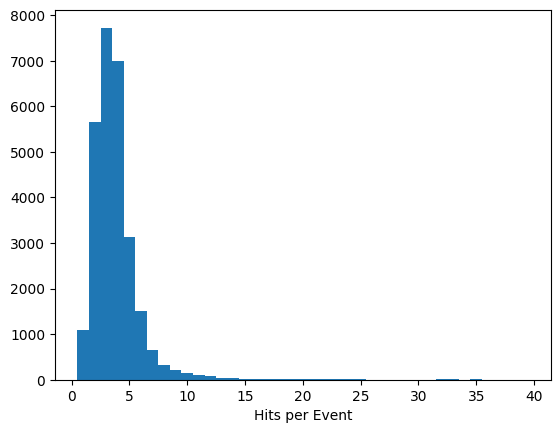

In [42]:
print(det.dream_data.fit_params['amplitude'])
print(det.dream_data.fit_params['amplitude'].shape)
hits_per_event = np.sum(~np.isnan(det.dream_data.fit_params['amplitude']), axis=1)
print(hits_per_event)

fig, ax = plt.subplots()
ax.hist(hits_per_event, bins=np.arange(0.5, 40.5, 1))
ax.set_xlabel('Hits per Event')

In [43]:
print(det.dream_data.fit_params.keys())

dict_keys(['amplitude', 'time_max', 'success'])


In [44]:
min_hits = 4
hits_mask = hits_per_event >= min_hits

det.dream_data.fit_params['time_max'][hits_mask]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [51]:
all_ray_xy_angles = np.arctan(np.sqrt(np.tan(all_ray_x_angles)**2 + np.tan(all_ray_y_angles)**2))
print(all_ray_xy_angles.shape)
print(hits_per_event.shape)
print(det.dream_data.event_nums.shape)
ray_hit_mask = np.isin(det.dream_data.event_nums, all_ray_event_nums)
print(hits_per_event[ray_hit_mask].shape)

(26542,)
(96834,)
(96834,)
(26542,)


Text(0, 0.5, 'Hits per Event')

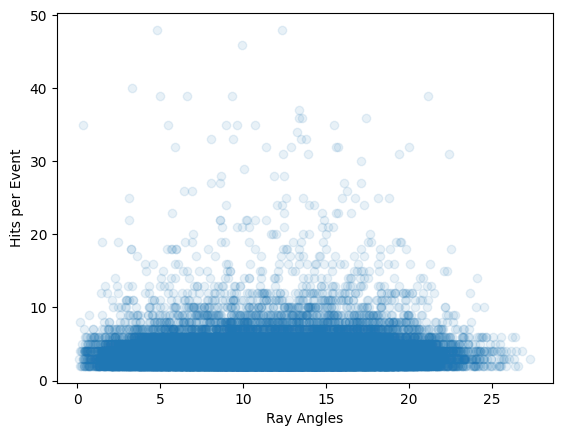

In [52]:
# Plot correlation between ray angle and number of hits
fig, ax = plt.subplots()
ax.scatter(np.rad2deg(all_ray_xy_angles), hits_per_event[ray_hit_mask], alpha=0.1)
ax.set_xlabel('Ray Angles')
ax.set_ylabel('Hits per Event')

Pre-filtered rays: 306473
All rays: 66271


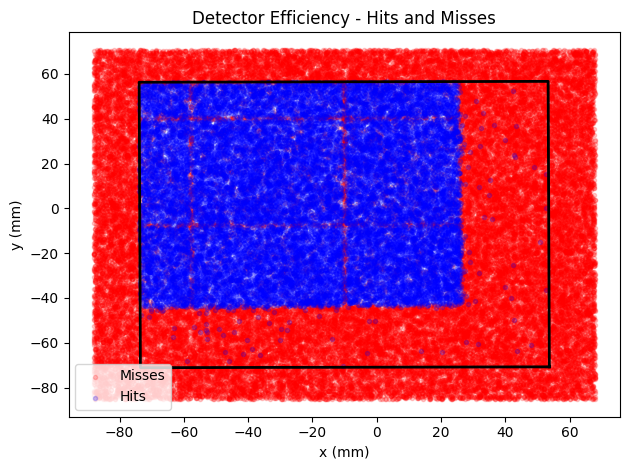

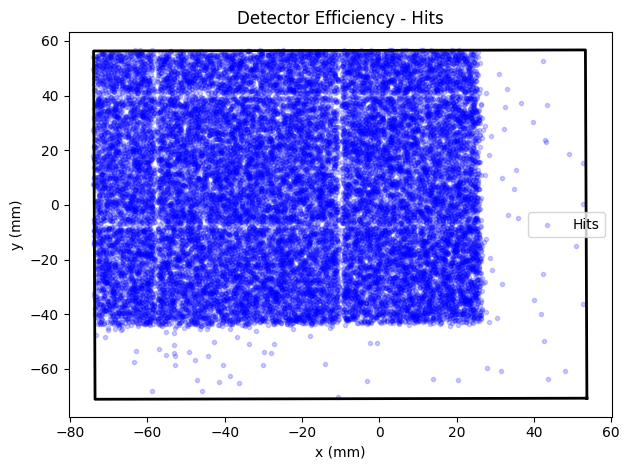

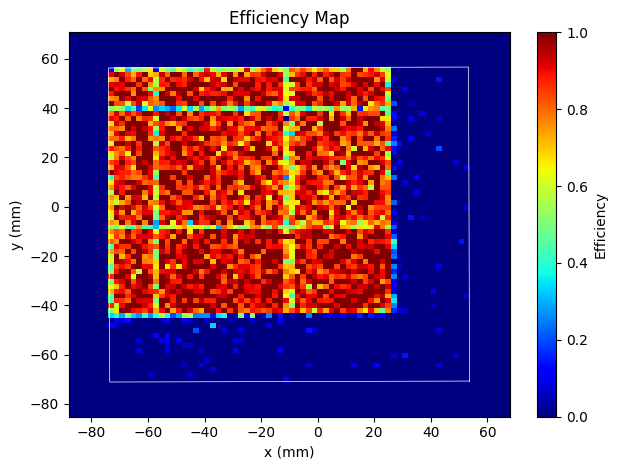

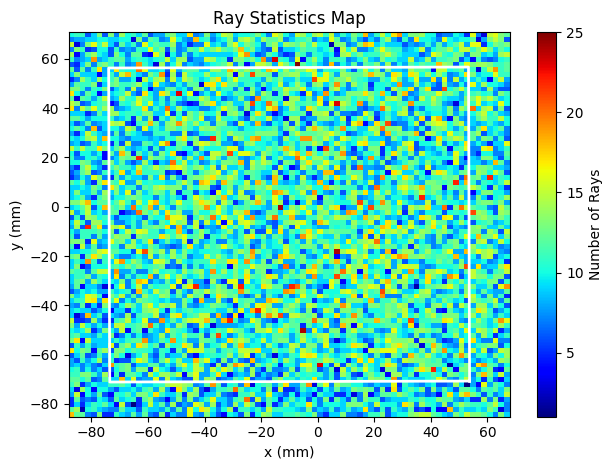

In [16]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2, grid_size=2)

X Residuals: Mean=-5μm, Std=374μm
Y Residuals: Mean=-21μm, Std=414μm
X Residuals: Mean=15μm, Std=429μm
Y Residuals: Mean=8μm, Std=440μm
X Residuals: Mean=-13μm, Std=465μm
Y Residuals: Mean=12μm, Std=450μm
X Residuals: Mean=-14μm, Std=385μm
Y Residuals: Mean=-14μm, Std=377μm


C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:1479: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


X Residuals: Mean=-5μm, Std=465μm
Y Residuals: Mean=-17μm, Std=434μm
X Residuals: Mean=-3μm, Std=529μm
Y Residuals: Mean=30μm, Std=394μm
X Residuals: Mean=-8μm, Std=350μm
Y Residuals: Mean=-7μm, Std=514μm
X Residuals: Mean=19μm, Std=467μm
Y Residuals: Mean=-1μm, Std=525μm


C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:1488: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


X Residuals: Mean=-2μm, Std=467μm
Y Residuals: Mean=0μm, Std=525μm


(-0.003915508147391047,
 0.0007904228280054705,
 0.3657534623401196,
 0.4166866852502901)

C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


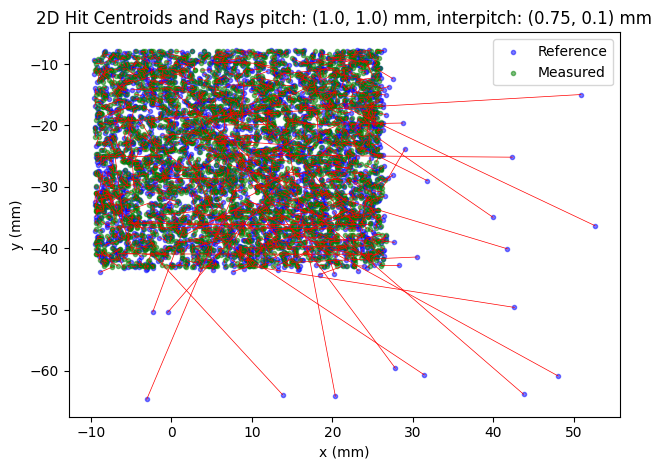

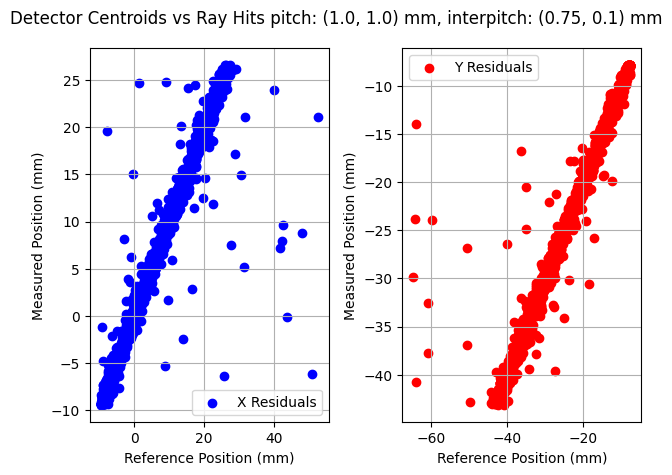

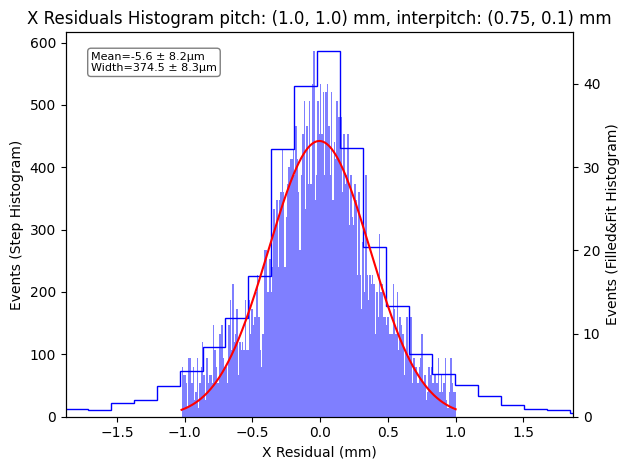

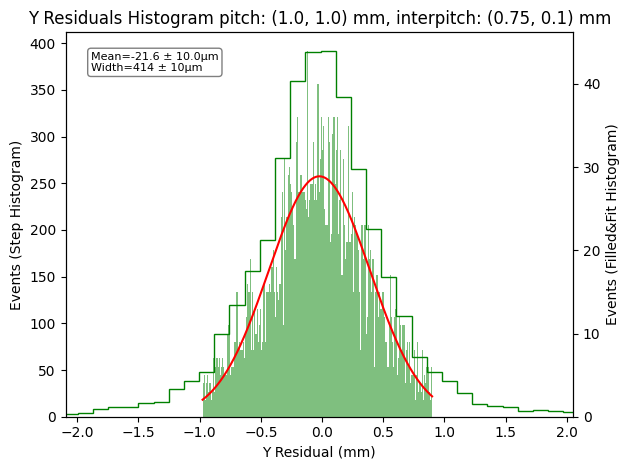

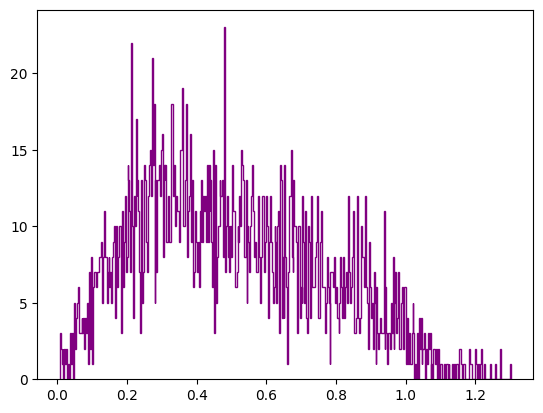

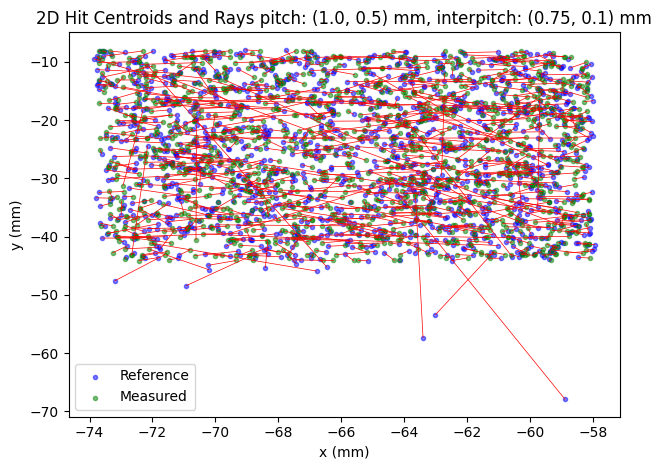

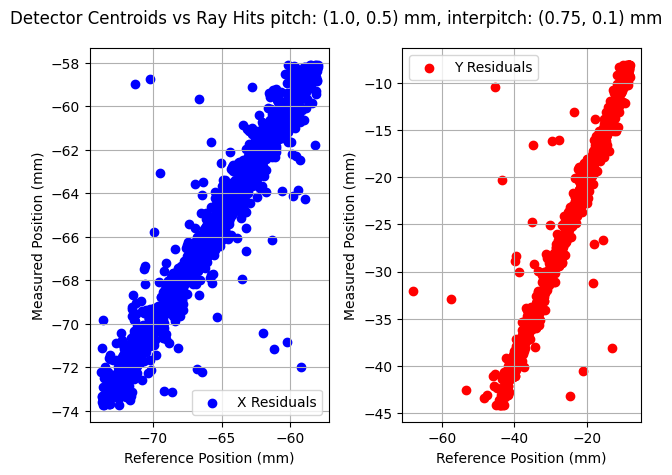

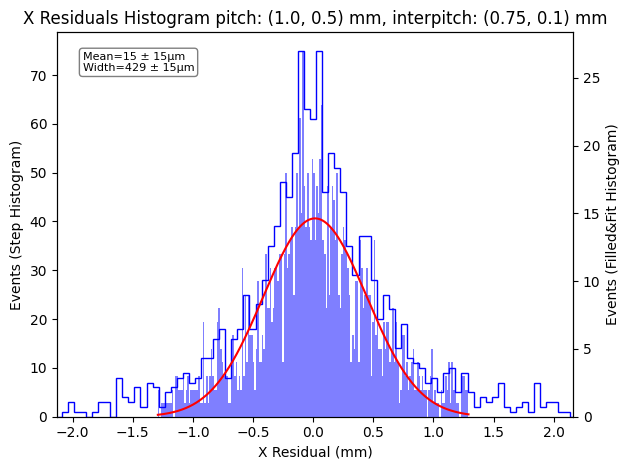

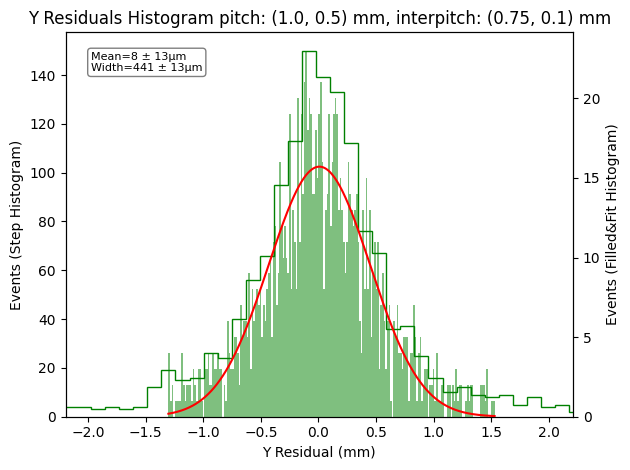

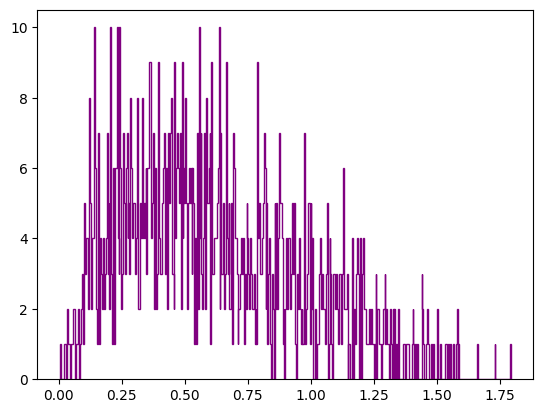

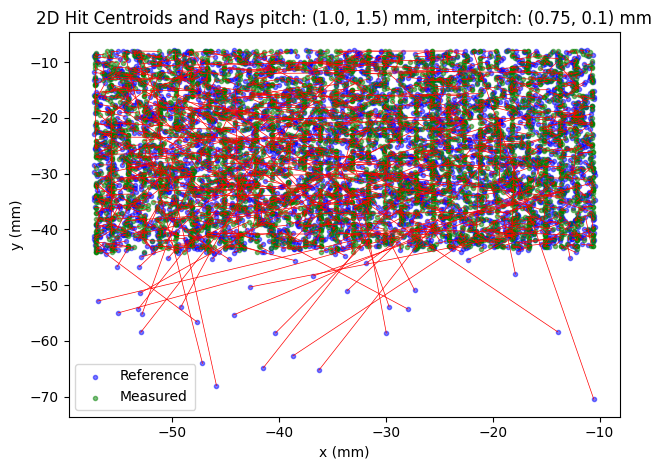

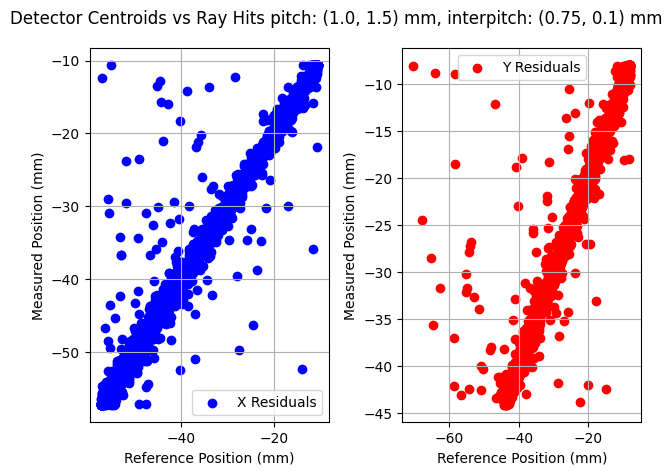

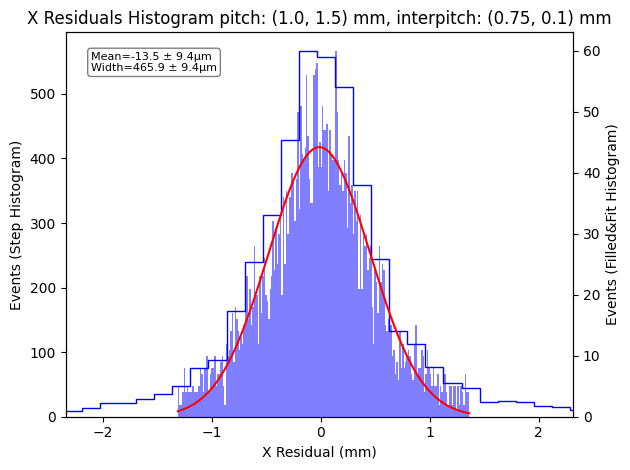

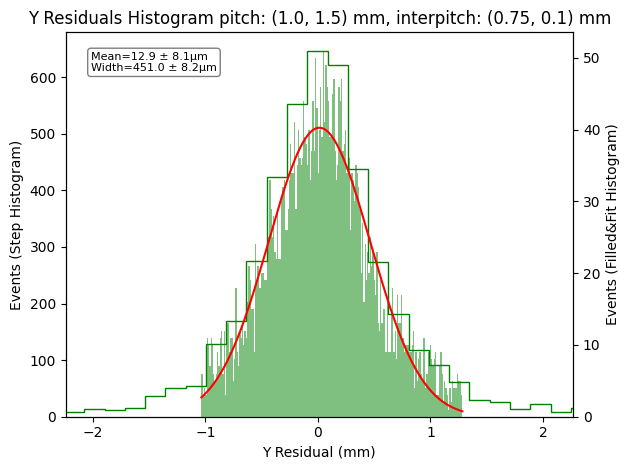

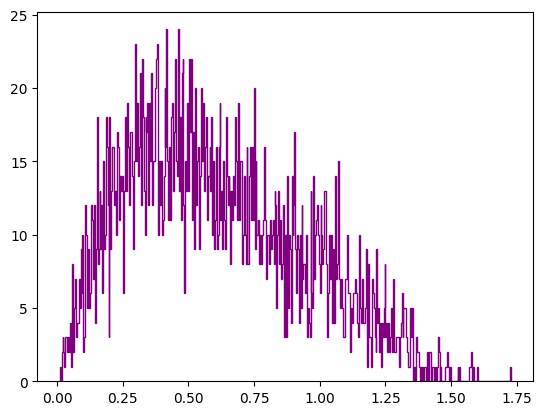

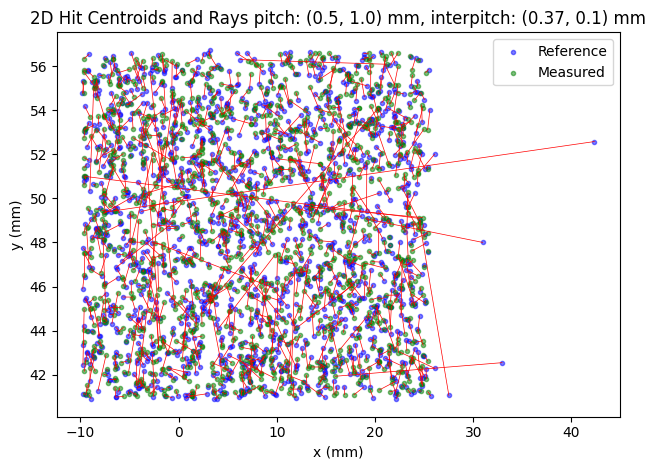

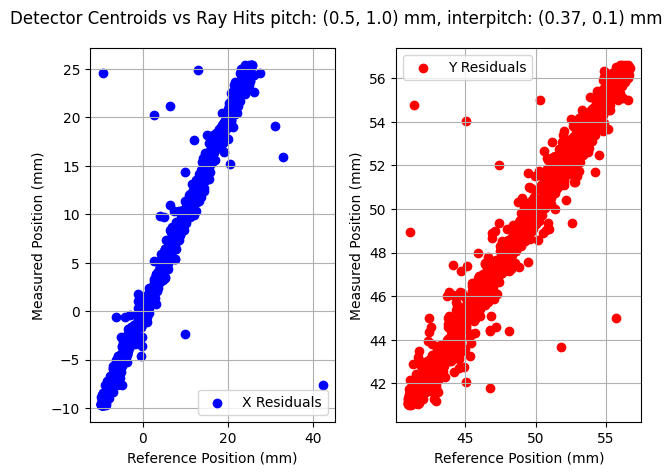

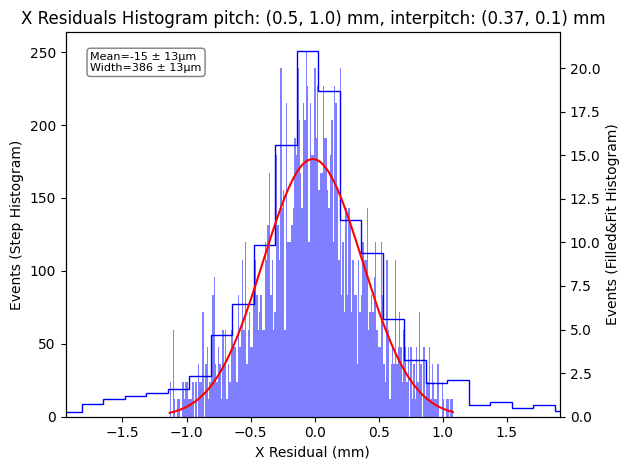

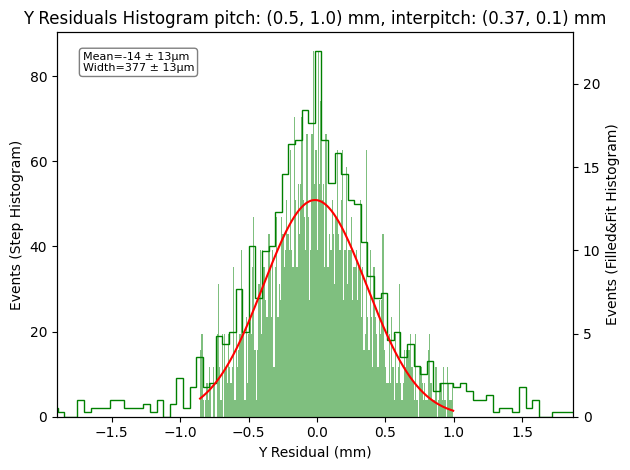

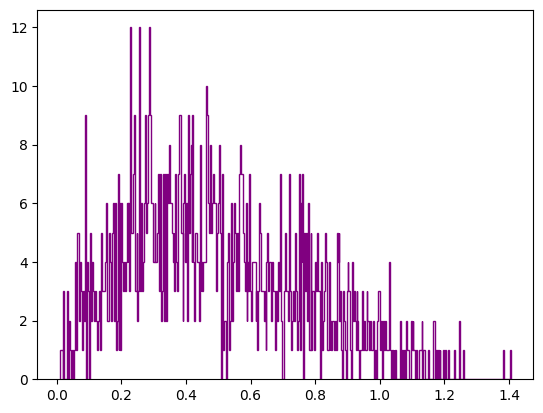

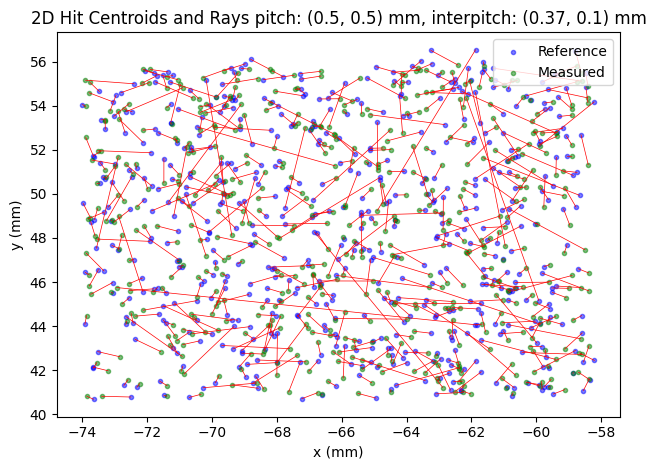

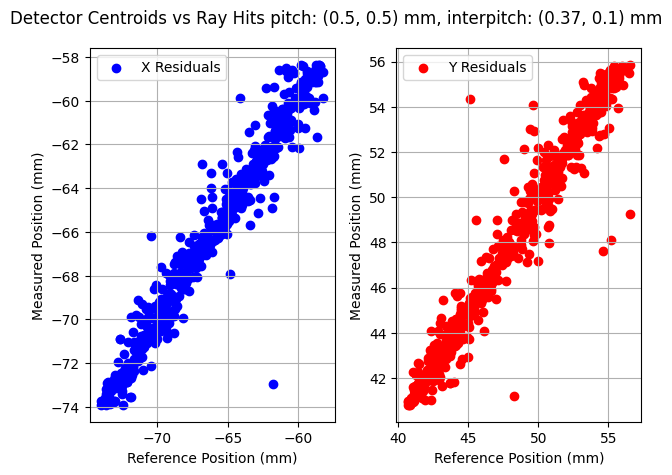

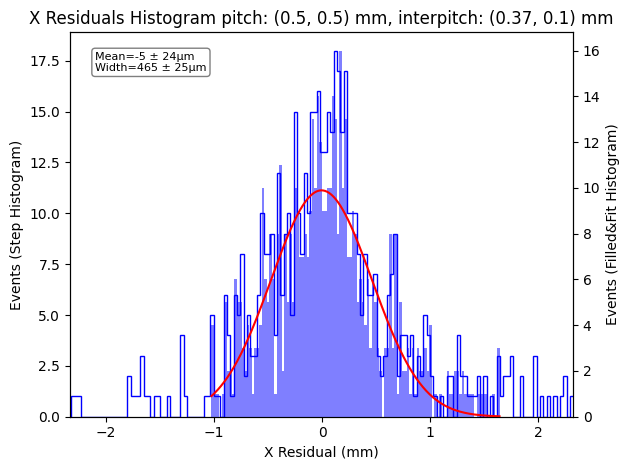

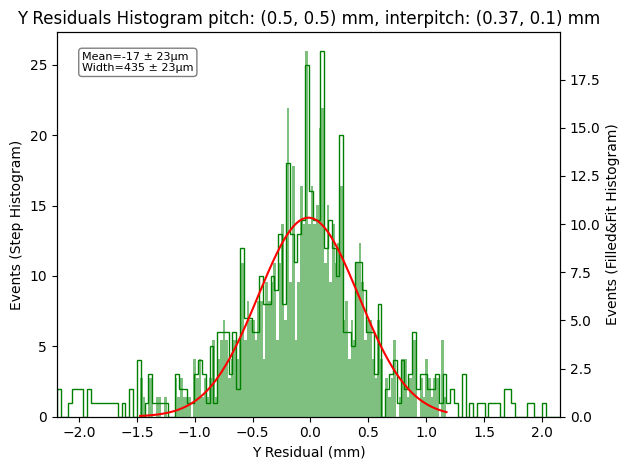

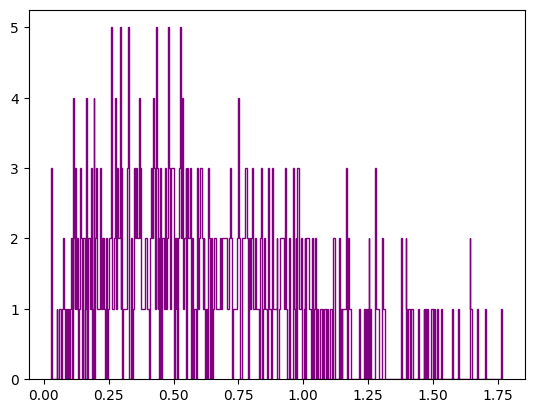

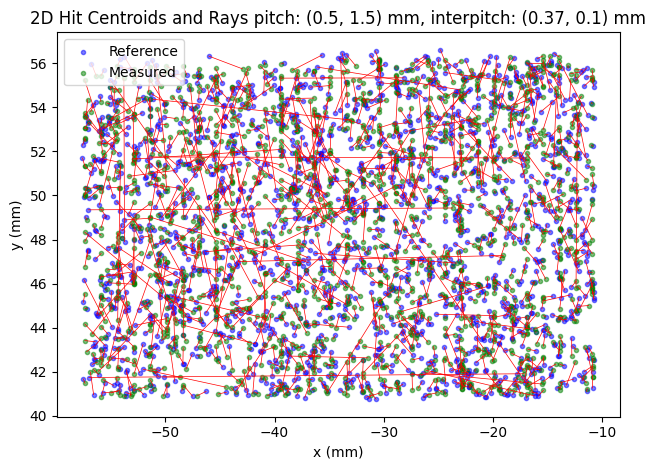

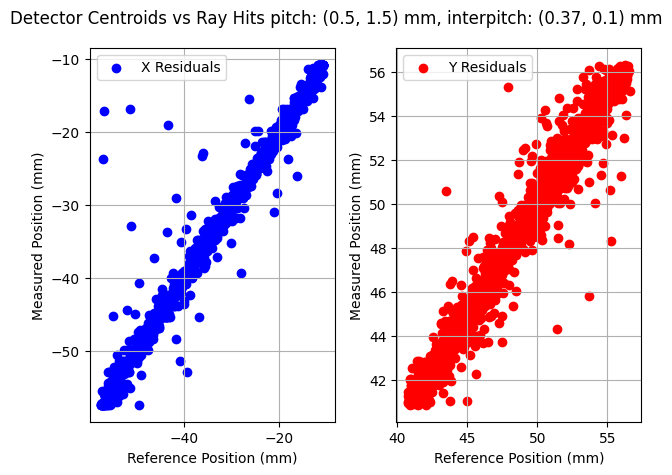

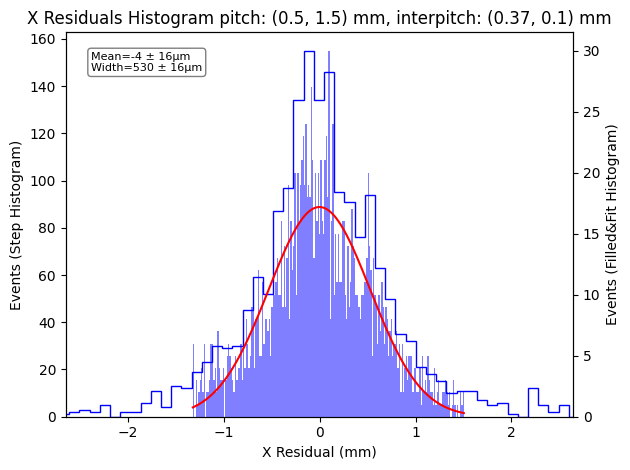

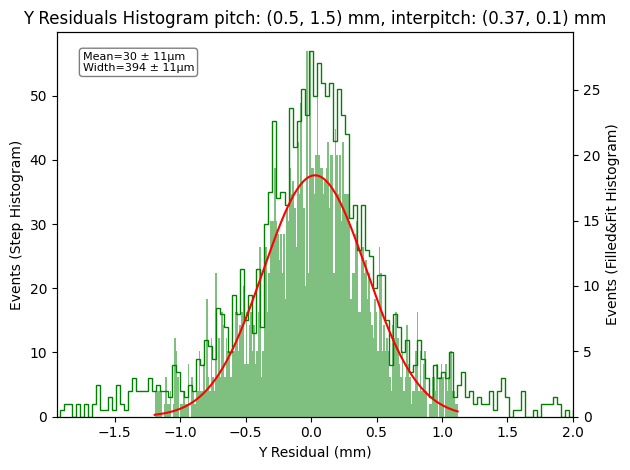

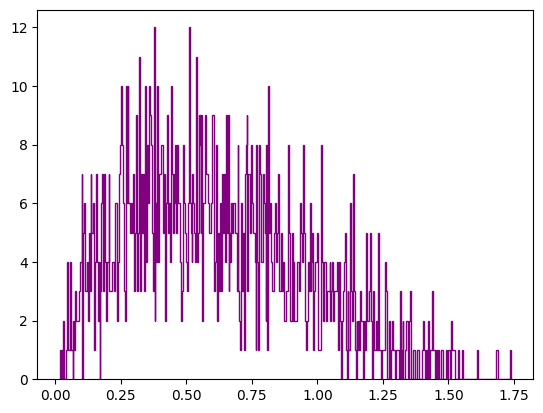

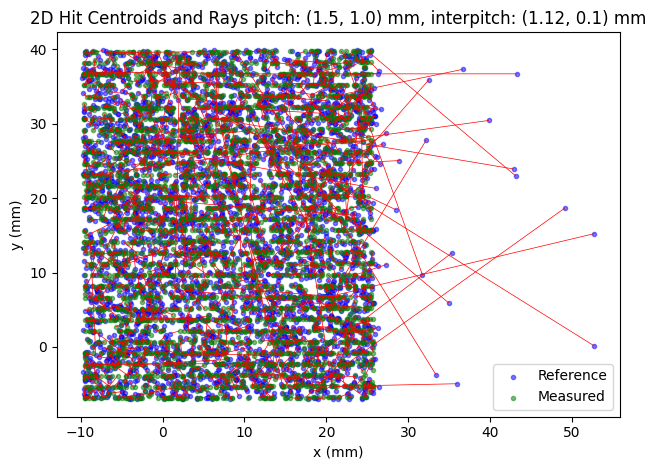

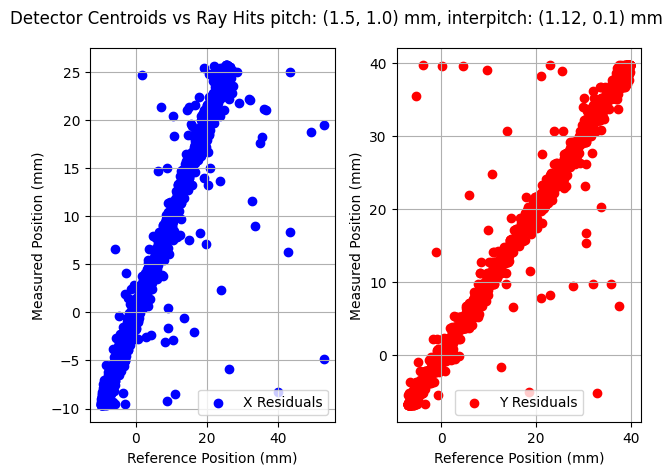

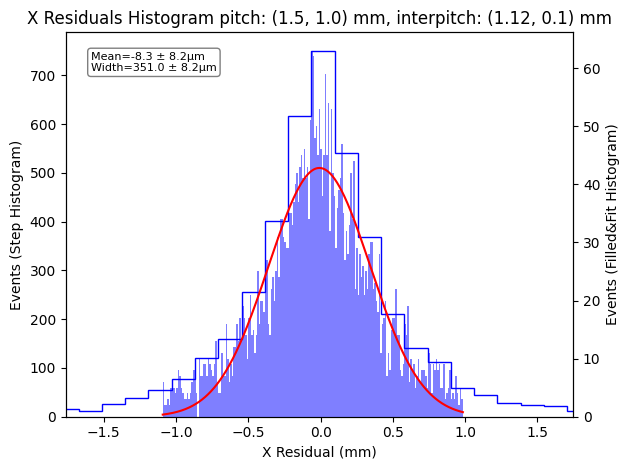

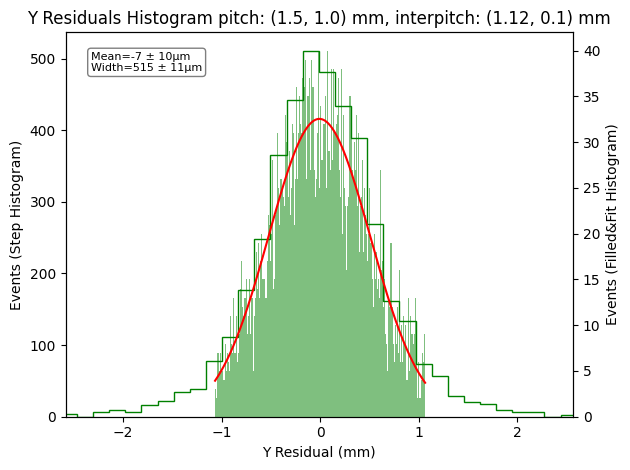

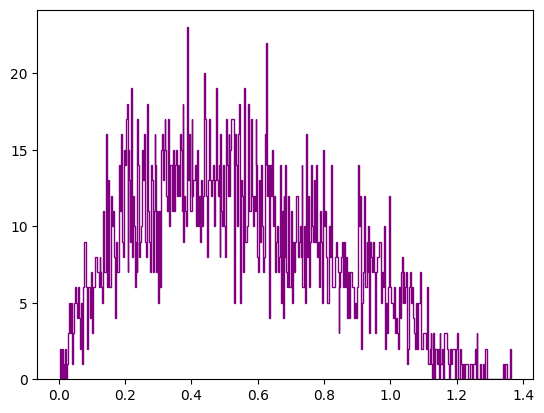

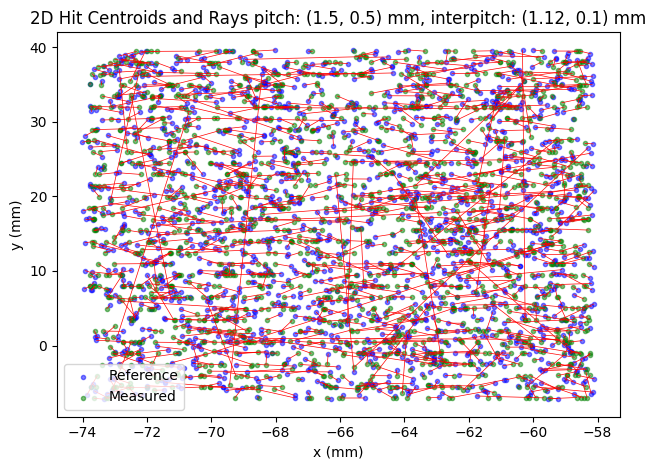

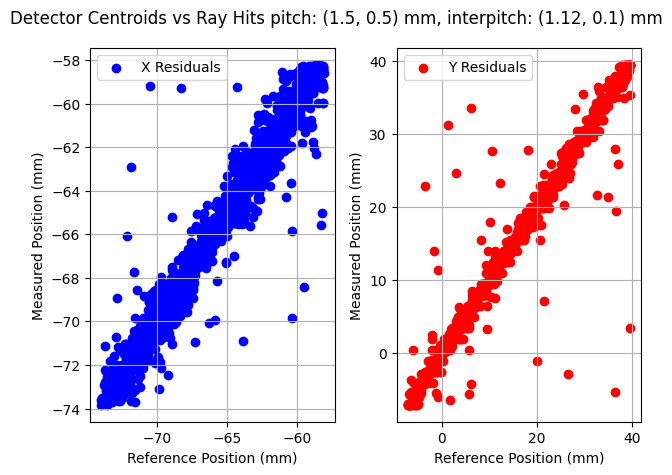

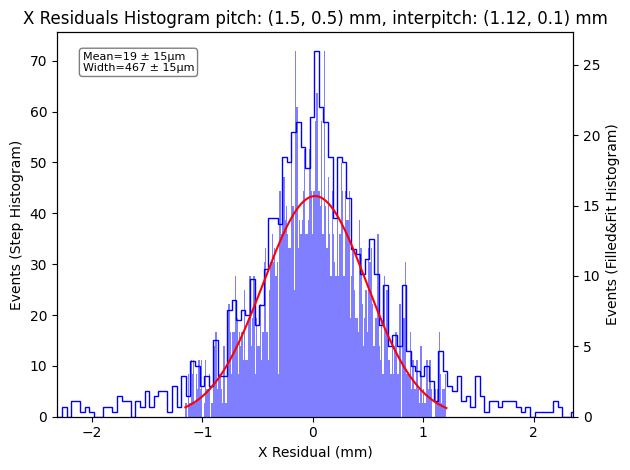

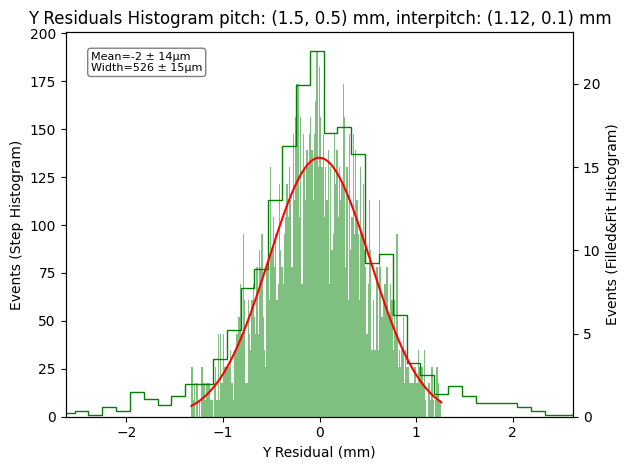

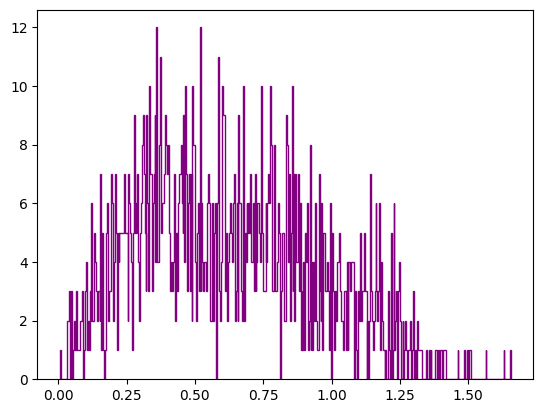

C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


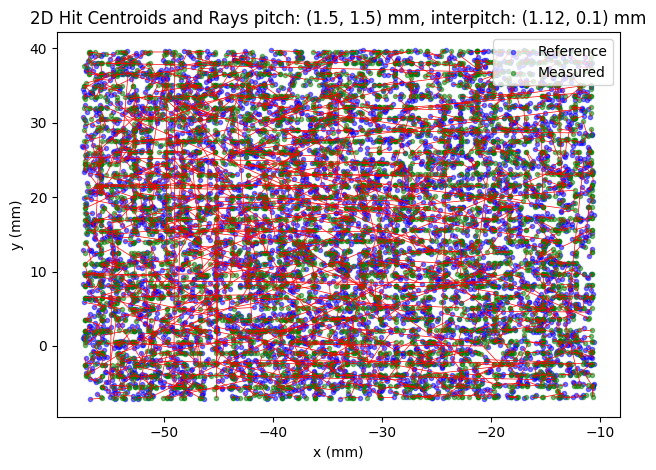

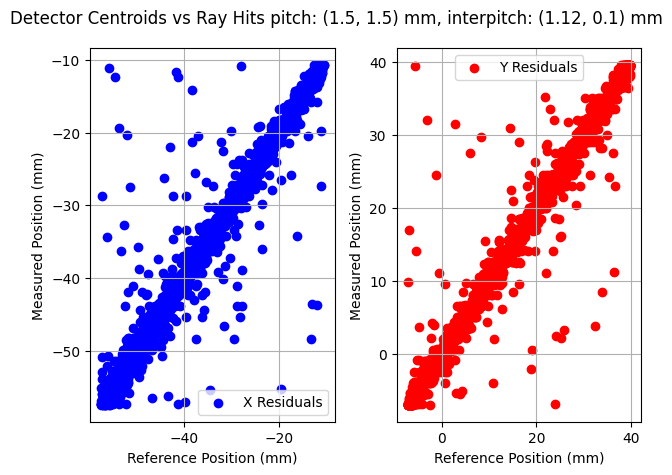

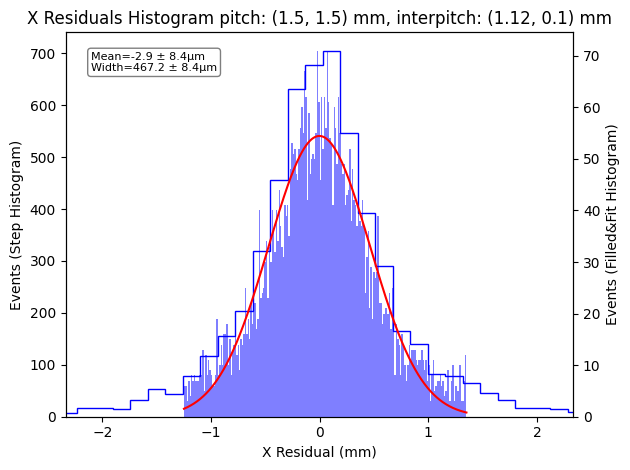

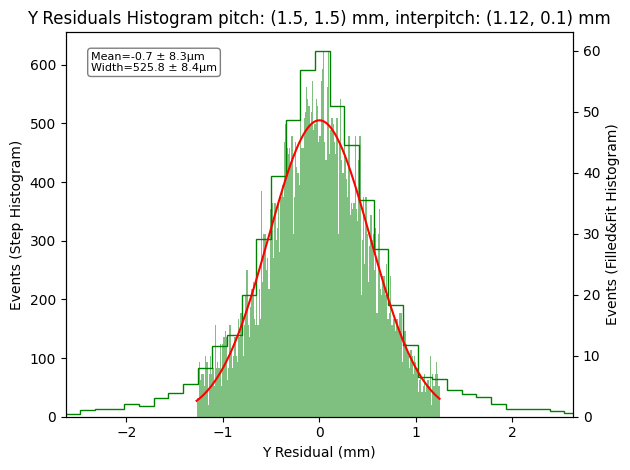

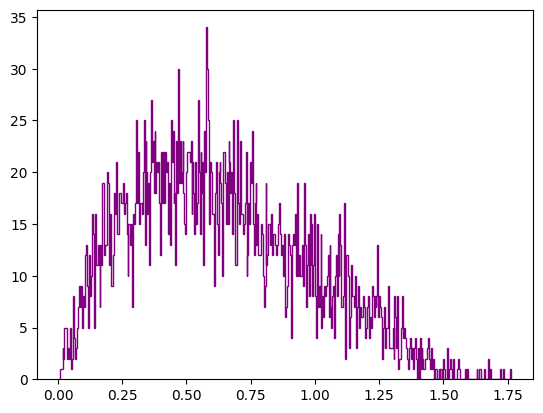

In [17]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [18]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2)

   pitch_x  pitch_y  interpitch_x  interpitch_y    x_mean  x_mean_err  \
0      1.0      1.0          0.75           0.1 -0.005561    0.008201   
1      1.0      0.5          0.75           0.1  0.015309    0.014982   
2      1.0      1.5          0.75           0.1 -0.013508    0.009379   
3      0.5      1.0          0.37           0.1 -0.014510    0.012663   
4      0.5      0.5          0.37           0.1 -0.005454    0.024721   
5      0.5      1.5          0.37           0.1 -0.003862    0.016206   
6      1.5      1.0          1.12           0.1 -0.008273    0.008167   
7      1.5      0.5          1.12           0.1  0.019288    0.015124   
8      1.5      1.5          1.12           0.1 -0.002937    0.008394   

     y_mean  y_mean_err     x_std  x_std_err     y_std  y_std_err  
0  0.414452    0.010333  0.374494   0.008259  0.414452   0.010333  
1  0.440811    0.013312  0.429135   0.015008  0.440811   0.013312  
2  0.450963    0.008245  0.465872   0.009413  0.450963   0.008245

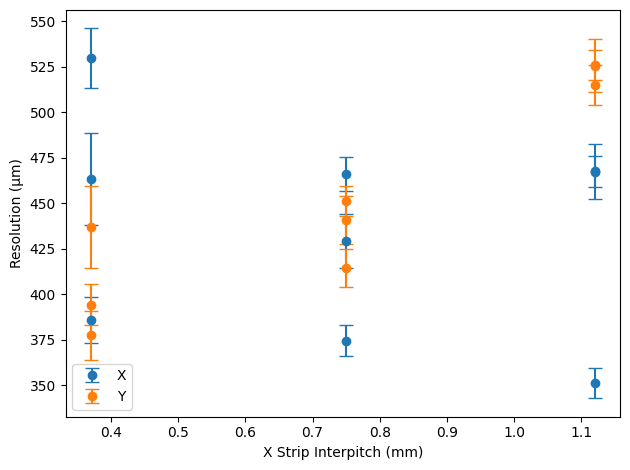

In [19]:
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

   pitch_x  pitch_y  interpitch_x  interpitch_y    x_mean  x_mean_err  \
0      1.0      1.0          0.75           0.1 -0.005887    0.008532   
1      1.0      0.5          0.75           0.1  0.014719    0.014954   
2      1.0      1.5          0.75           0.1 -0.014743    0.009323   
3      0.5      1.0          0.37           0.1 -0.016192    0.013266   
4      0.5      0.5          0.37           0.1 -0.003326    0.024100   
5      0.5      1.5          0.37           0.1 -0.001285    0.016775   
6      1.5      1.0          1.12           0.1 -0.008039    0.008187   
7      1.5      0.5          1.12           0.1  0.022451    0.014132   
8      1.5      1.5          1.12           0.1 -0.002854    0.009023   

     y_mean  y_mean_err     x_std  x_std_err     y_std  y_std_err  
0  0.407182    0.010858  0.363419   0.008725  0.407182   0.010858  
1  0.419315    0.015351  0.405097   0.015305  0.419315   0.015351  
2  0.428768    0.008728  0.441916   0.009743  0.428768   0.008728

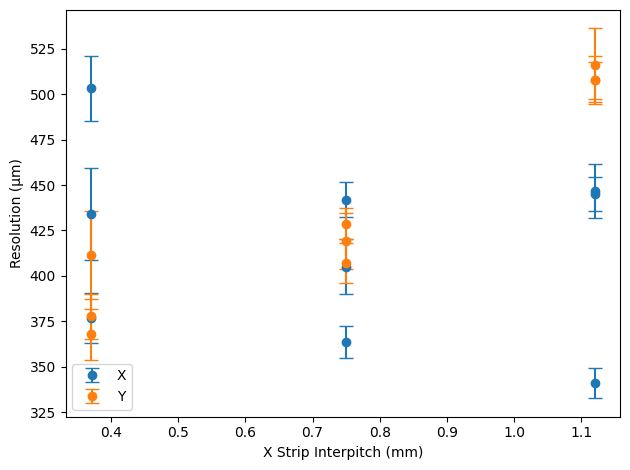

In [20]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

New stuff above

   pitch_x  pitch_y  interpitch_x  interpitch_y    x_mean  x_mean_err  \
0      1.0      1.0          0.75           0.1 -0.005887    0.008532   
1      1.0      0.5          0.75           0.1  0.014719    0.014954   
2      1.0      1.5          0.75           0.1 -0.014743    0.009323   
3      0.5      1.0          0.37           0.1 -0.016192    0.013266   
4      0.5      0.5          0.37           0.1 -0.003326    0.024100   
5      0.5      1.5          0.37           0.1 -0.001285    0.016775   
6      1.5      1.0          1.12           0.1 -0.008039    0.008187   
7      1.5      0.5          1.12           0.1  0.022451    0.014132   
8      1.5      1.5          1.12           0.1 -0.002854    0.009023   

     y_mean  y_mean_err     x_std  x_std_err     y_std  y_std_err  
0  0.407182    0.010858  0.363419   0.008725  0.407182   0.010858  
1  0.419315    0.015351  0.405097   0.015305  0.419315   0.015351  
2  0.428768    0.008728  0.441916   0.009743  0.428768   0.008728

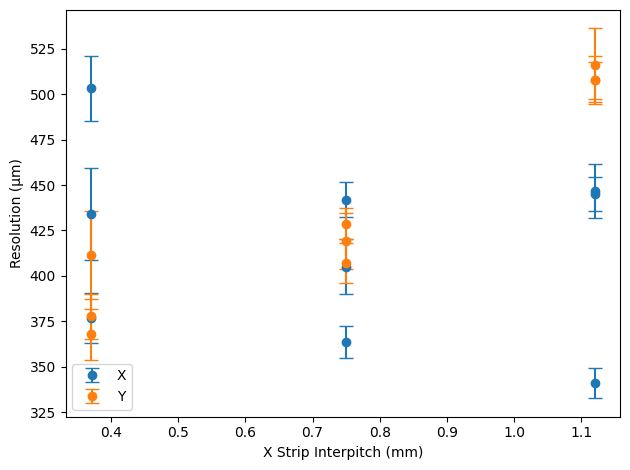

In [21]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

Rays in sub-detector 0: 9871, total rays: 306473
Rays in sub-detector 1: 1840, total rays: 306473
Rays in sub-detector 2: 6972, total rays: 306473
Rays in sub-detector 3: 1954, total rays: 306473
Rays in sub-detector 4: 361, total rays: 306473
Rays in sub-detector 5: 1346, total rays: 306473
Rays in sub-detector 6: 7005, total rays: 306473
Rays in sub-detector 7: 1309, total rays: 306473
Rays in sub-detector 8: 5187, total rays: 306473


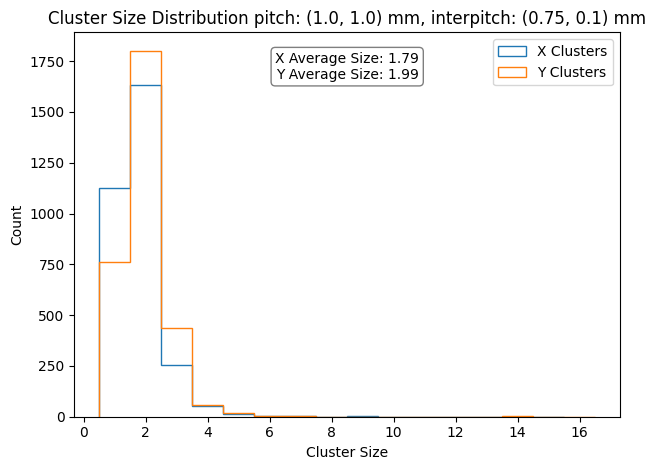

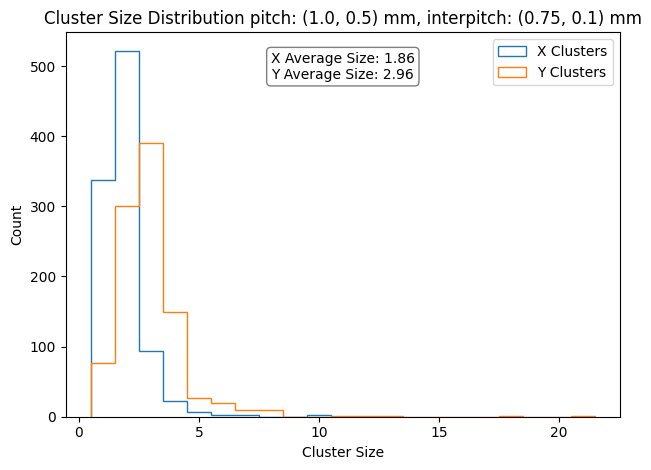

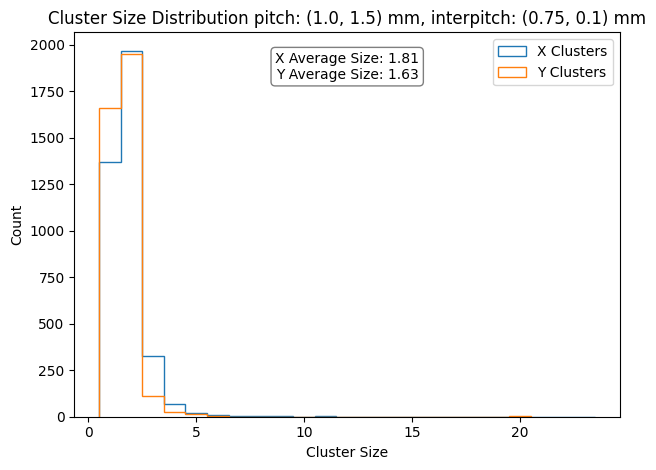

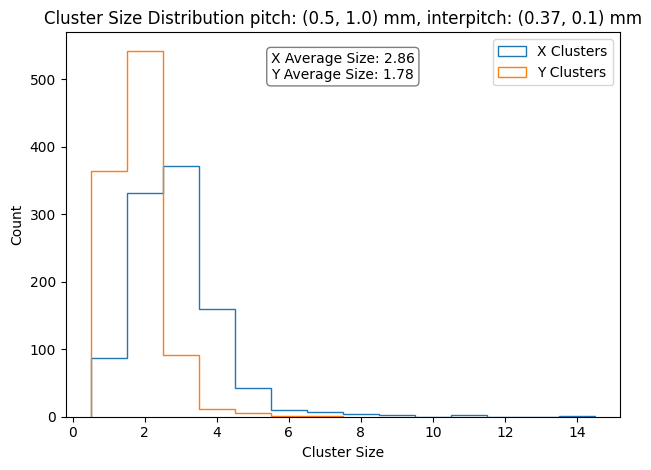

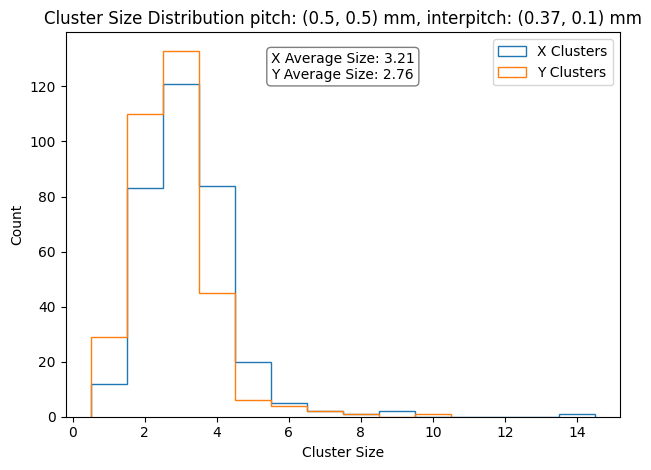

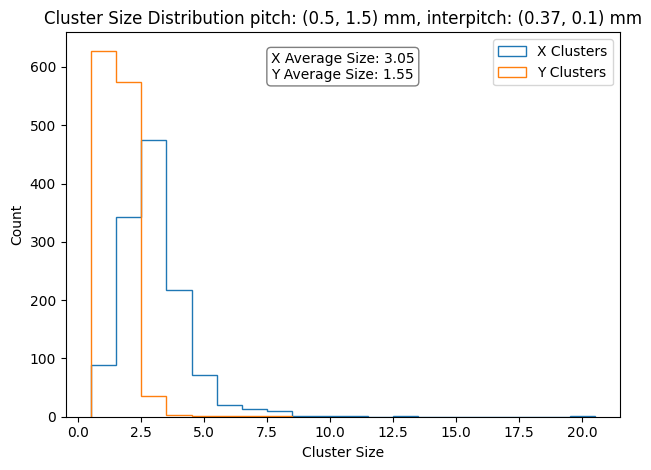

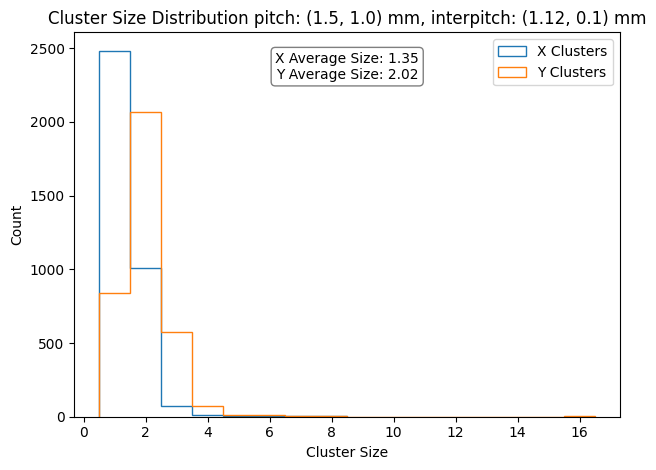

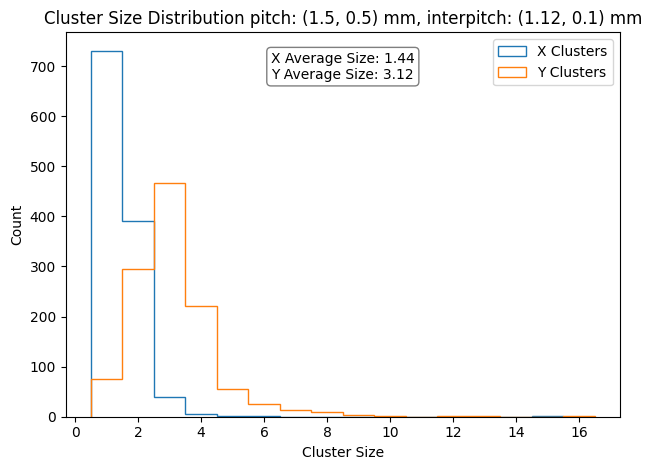

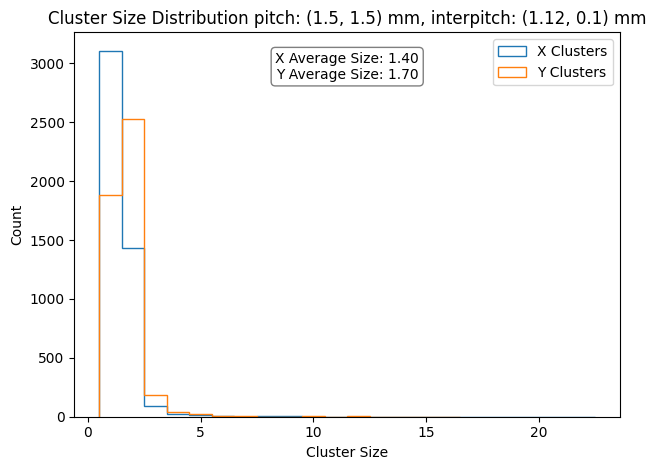

In [22]:
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
pitches, x_means, x_errs, y_means, y_errs = [], [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=-2)
    print(f'Rays in sub-detector {sub_det.sub_index}: {len(x_rays_in)}, total rays: {len(x_rays)}')
    x_mean, y_mean, x_err, y_err = sub_det.plot_cluster_sizes(event_nums=event_num_rays_in)
    pitches.append(sub_det.x_interpitch)
    x_means.append(x_mean)
    x_errs.append(x_err)
    y_means.append(y_mean)
    y_errs.append(y_err)

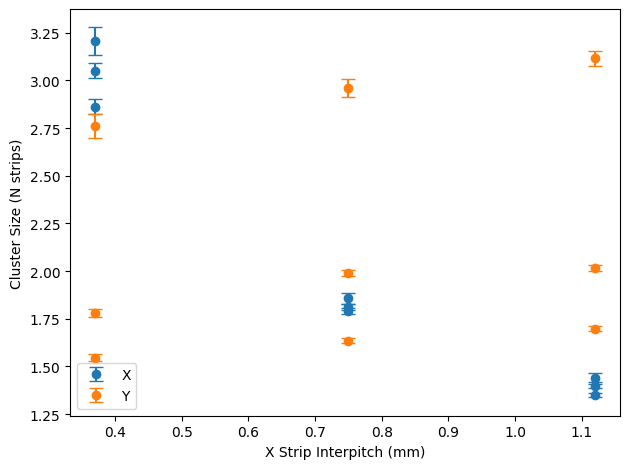

In [23]:
fig, ax = plt.subplots()
ax.errorbar(pitches, x_means, yerr=x_errs, fmt='o', capsize=5, label='X')
ax.errorbar(pitches, y_means, yerr=y_errs, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

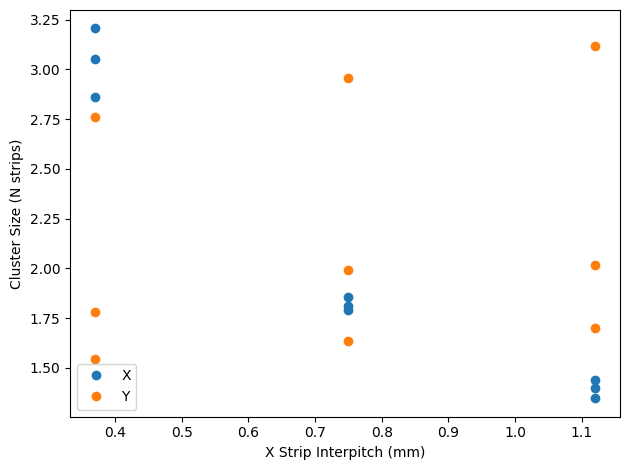

In [24]:
fig, ax = plt.subplots()
ax.plot(pitches, x_means, 'o', label='X')
ax.plot(pitches, y_means, 'o', label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

In [25]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)

C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:822: RuntimeWarning: All-NaN axis encountered
  print(f'scan_res min: {np.nanmin(scan_resolution_vals)}, max: {np.nanmax(scan_resolution_vals)}')
C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:823: RuntimeWarning: All-NaN axis encountered
  res_vmin, res_vmax = np.nanmin(scan_resolution_vals), np.nanpercentile(scan_resolution_vals, percentile_filter[1])
C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Dylan\anaconda3\envs\saclay_micromegas\lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


scan_res min: nan, max: nan
res_vmax: nan
mean_vmin: nan, mean_vmax: nan


ValueError: Axis limits cannot be NaN or Inf

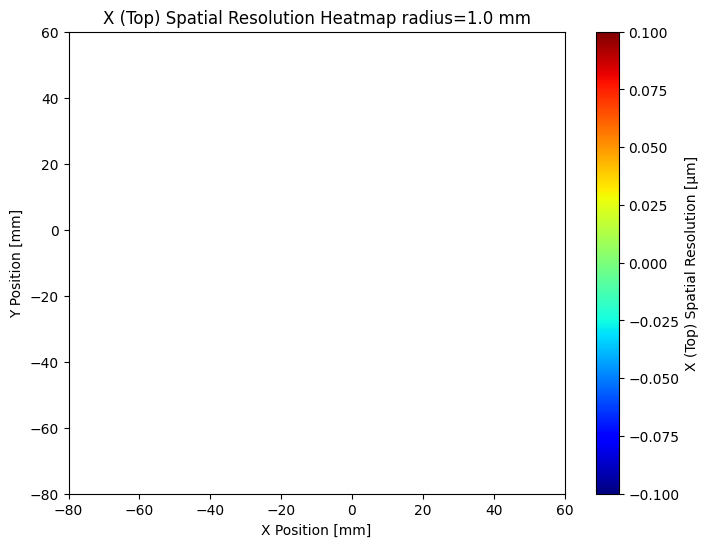

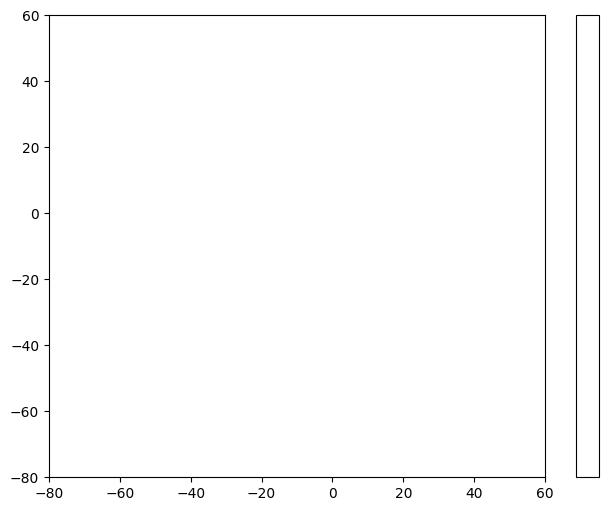

In [26]:
scan_xs = np.linspace(-80, 60, 140 + 1)
scan_ys = np.linspace(-80, 60, 140 + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs
scan_radius = 1
min_events = 30
# res_range = [160, 810]  # μm
# mean_range = [-200, 210]  # μm
res_range = None  # μm
mean_range = None  # μm

scan_resolutions_x, scan_means_x, events_x = get_circle_scan(np.array(x_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_x, scan_means_x, scan_xs, scan_ys, scan_events=events_x, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='X (Top) Spatial Resolution', mean_title='X (Top) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_resolutions_y, scan_means_y, events_y = get_circle_scan(np.array(y_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_y, scan_means_y, scan_xs, scan_ys, scan_events=events_y, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='Y (Bottom) Spatial Resolution', mean_title='Y (Bottom) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)
scan_radius = 2
min_events = 50
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
x_sizes_all, y_sizes_all, x_rays_cluster_sizes, y_rays_cluster_sizes = [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=0)
    x_sizes, y_sizes, ray_mask = sub_det.get_cluster_sizes(largest=True, event_nums=event_num_rays_in, return_ray_mask=True)
    x_sizes_all.extend(x_sizes)
    y_sizes_all.extend(y_sizes)
    x_rays_cluster_sizes.extend(x_rays_in[ray_mask])
    y_rays_cluster_sizes.extend(y_rays_in[ray_mask])
scan_resolutions_csx, scan_means_csx, events_csx = get_circle_scan(np.array(x_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, shape='square', gaus_fit=False, min_events=min_events, plot=False)
plot_2D_circle_scan(scan_resolutions_csx, scan_means_csx, scan_xs, scan_ys, scan_events=events_csx, radius=scan_radius, percentile_filter=(1, 95), plot='mean', unit_str='N strips', mean_title='X Cluster Size')

In [ ]:
scan_resolutions_csy, scan_means_csy, events_csy = get_circle_scan(np.array(y_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, percentile_cuts=(1, 99), shape='square', gaus_fit=False, min_events=min_events, plot=False)
plot_2D_circle_scan(scan_resolutions_csy, scan_means_csy, scan_xs, scan_ys, scan_events=events_csy, radius=scan_radius, percentile_filter=(1, 99), plot='mean', unit_str='N strips', mean_title='Y Cluster Size')

In [ ]:
det.dream_data.correct_for_fine_timestamps()

sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
plt.title(f'Time of Max for X (Top) Strips')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips')

In [ ]:
min_amp = 600
sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for X (Top) Strips Min Amp {min_amp}')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips Min Amp {min_amp}')

In [ ]:
x_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, filter_times=False)
x_time_maxes, x_time_filter = det.dream_data.filter_time_maxes(x_time_maxes, return_mask=True)
y_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, filter_times=False)
y_time_maxes, y_time_filter = det.dream_data.filter_time_maxes(y_time_maxes, return_mask=True)
time_ray_event_mask_x = np.isin(event_num_rays, det.dream_data.event_nums[x_time_filter])
time_ray_event_mask_y = np.isin(event_num_rays, det.dream_data.event_nums[y_time_filter])
x_rays_timing_x, y_rays_timing_x = x_rays[time_ray_event_mask_x], y_rays[time_ray_event_mask_x]
x_rays_timing_y, y_rays_timing_y = x_rays[time_ray_event_mask_y], y_rays[time_ray_event_mask_y]

In [ ]:
scan_radius = 2
min_events = 100
res_range = [20, 44]  # ns
mean_range = [405, 425]  # ns
scan_time_resolutions_x, scan_time_means_x, events_time_x = get_circle_scan(np.array(x_time_maxes), np.array(x_rays_timing_x), np.array(y_rays_timing_x), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_x, scan_time_means_x, scan_xs, scan_ys, scan_events=events_time_x, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution X (Top) Strips', mean_title='Mean Time X (Top) Strips', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_time_resolutions_y, scan_time_means_y, events_time_y = get_circle_scan(np.array(y_time_maxes), np.array(x_rays_timing_y), np.array(y_rays_timing_y), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_y, scan_time_means_y, scan_xs, scan_ys, scan_events=events_time_y, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution Y (Bottom) Strips', mean_title='Mean Time Y (Bottom) Strips', res_range=res_range, mean_range=mean_range)

In [ ]:
edge_cushion = 5 # mm
det_z = det.center[2]
for sub_det in det.sub_detectors:
    x_min_loc, x_max_loc = np.min(sub_det.x_pos), np.max(sub_det.x_pos)
    y_min_loc, y_max_loc = np.min(sub_det.y_pos), np.max(sub_det.y_pos)
    top_left, top_right = (x_min_loc, y_max_loc, det_z), (x_max_loc, y_max_loc, det_z)
    bottom_left, bottom_right = (x_min_loc, y_min_loc, det_z), (x_max_loc, y_min_loc, det_z)
    top_left, top_right = det.convert_coords_to_global(top_left), det.convert_coords_to_global(top_right)
    bottom_left, bottom_right = det.convert_coords_to_global(bottom_left), det.convert_coords_to_global(bottom_right)
    print(f'Sub-detector {sub_det.sub_index} corners:')
    print(f'Top Left: {top_left}, Top Right: {top_right}, Bottom Left: {bottom_left}, Bottom Right: {bottom_right}')
